<a href="https://colab.research.google.com/github/robinhester/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/Machine_Learning_Problems__LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [0]:
import pandas as pd

In [0]:
hs = pd.read_csv('https://raw.githubusercontent.com/robinhester/Hearthstone_Build/master/top_hearthstone_decks_20200221.csv')

In [94]:
hs.head()

,type,dust,wr,games,duration,card_0,card_1,card_2,card_3,card_4,card_5,card_6,card_7,card_8,card_9,card_10,card_11,card_12,card_13,card_14,card_15,card_16,card_17,card_18,card_19,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29,wins,hero
0,Resurrect Priest,9840,0.602,1100,11.0,Forbidden Words,Penance,Bad Luck Albatross,Breath of the Infinite,Grave Rune,Mass Dispel,Psychopomp,Convincing Infiltrator,Mass Hysteria,Sandhoof Waterbearer,Time Rip,Zilliax,Khartut Defender,"Galakrond, the Unspeakable",Catrina Muerte,Mass Resurrection,Plague of Death,Zerek's Cloning Gallery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,662.2,Priest
1,Dragon Hunter,5280,0.598,43000,5.6,Blazing Battlemage,Dwarven Sharpshooter,Tracking,Corrosive Breath,Faerie Dragon,Freezing Trap,Phase Stalker,Snake Trap,Primordial Explorer,Scalerider,Stormhammer,Dragonbane,Evasive Feywing,Frenzied Felwing,Big Ol' Whelp,Leeroy Jenkins,Rotnest Drake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25714.0,Hunter
2,Highlander Hunter,15600,0.593,1800,7.2,Blazing Battlemage,Crystallizer,Dwarven Sharpshooter,Springpaw,Tracking,Faerie Dragon,Phase Stalker,Rat Trap,Snake Trap,Sunreaver Spy,Zephrys the Great,Animal Companion,Deadly Shot,Desert Spear,Diving Gryphon,Kill Command,Nightmare Amalgam,Primordial Explorer,SN1P-SN4P,Stormhammer,Unleash the Hounds,Ursatron,Dragonmaw Poacher,Houndmaster Shaw,Faceless Corruptor,Zilliax,Veranus,Dinotamer Brann,Siamat,Dragonqueen Alexstrasza,1067.4,Hunter
3,Dragon Hunter,5340,0.591,3000,5.8,Blazing Battlemage,Dwarven Sharpshooter,Tracking,Corrosive Breath,Faerie Dragon,Freezing Trap,Phase Stalker,Snake Trap,Primordial Explorer,Scalerider,Stormhammer,Dragonbane,Evasive Feywing,Frenzied Felwing,Lifedrinker,Big Ol' Whelp,Leeroy Jenkins,Rotnest Drake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1773.0,Hunter
4,Mech Paladin,6240,0.589,1100,5.5,Blessing of Wisdom,Crystology,Glow-Tron,Hot Air Balloon,Mecharoo,Galvanizer,Shotbot,Goboglide Tech,Sky Claw,SN1P-SN4P,Annoy-o-Module,Blessing of Kings,Replicating Menace,Truesilver Champion,Leeroy Jenkins,Wargear,Zilliax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,647.9,Paladin


In [0]:
#target is win. Would this deck win. 
# In this case, my wins are in a ratio, or multiple format. I need to create a target column. 
#if the win ratio is above half, then the probability would be that this deck would win
#at some point, I need to know, if you are playing a higher win ratio deck, and come up against another
#high ratio deck, who wins? 

hs['would_win']=hs.wr > .50 

In [96]:
hs.would_win

0       True
1       True
2       True
3       True
4       True
       ...  
731    False
732    False
733    False
734    False
735    False
Name: would_win, Length: 736, dtype: bool

In [0]:
#would use a classification model for this kind of problem. 

In [98]:
hs.would_win.value_counts()

True     655
False     81
Name: would_win, dtype: int64

In [99]:
hs.would_win.value_counts(normalize=True)

True     0.889946
False    0.110054
Name: would_win, dtype: float64

In [0]:
#target is inbalanced class
#Need to decide what other types of measuring to use 

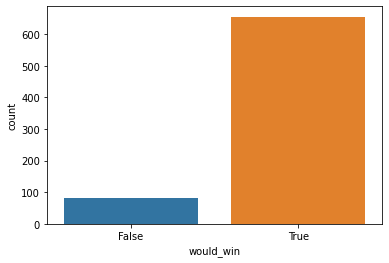

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(hs.would_win)

In [0]:
#do I need a higher win ratio? are there other factors I should take into account when deciding if they would win?

In [103]:
#fill in nan values with missing 
hs.isna().sum().sort_values(ascending=False)

card_29      560
card_28      560
card_27      559
card_26      559
card_25      559
card_24      559
card_23      558
card_22      557
card_21      553
card_20      544
card_19      487
card_18      383
card_17      253
card_16      102
card_15       14
duration       0
card_3         0
card_2         0
card_1         0
card_0         0
would_win      0
games          0
wr             0
card_5         0
dust           0
card_4         0
card_13        0
card_6         0
card_7         0
card_8         0
card_9         0
card_10        0
card_11        0
card_12        0
hero           0
card_14        0
wins           0
type           0
dtype: int64

In [104]:
hs.columns

Index(['type', 'dust', 'wr', 'games', 'duration', 'card_0', 'card_1', 'card_2',
       'card_3', 'card_4', 'card_5', 'card_6', 'card_7', 'card_8', 'card_9',
       'card_10', 'card_11', 'card_12', 'card_13', 'card_14', 'card_15',
       'card_16', 'card_17', 'card_18', 'card_19', 'card_20', 'card_21',
       'card_22', 'card_23', 'card_24', 'card_25', 'card_26', 'card_27',
       'card_28', 'card_29', 'wins', 'hero', 'would_win'],
      dtype='object')

In [0]:
hs = hs.fillna('Missing')

In [106]:
hs.hero.unique()

array(['Priest', 'Hunter', 'Paladin', 'Druid', 'Warrior', 'Warlock',
       'Rogue', 'Mage', 'Shaman'], dtype=object)

In [107]:
hs.type.unique()

array(['Resurrect Priest', 'Dragon Hunter', 'Highlander Hunter',
       'Mech Paladin', 'Quest Resurrect Priest',
       'Secret Highlander Hunter', 'Quest Hunter', 'Token Druid',
       'Face Hunter', 'Hunter', 'Embiggen Druid', 'Pirate Warrior',
       'Galakrond Zoo Warlock', 'Galakrond Rogue', 'Highlander Mage',
       'Murloc Shaman', 'Quest Druid', 'Highlander Galakrond Rogue',
       'Pure Paladin', 'Combo Priest', 'Galakrond Warrior',
       'Galakrond Warlock', 'Murloc Paladin', 'Quest Highlander Hunter',
       'Dragon Druid', 'Highlander Warrior', 'Hand Warlock',
       'Highlander Dragon Paladin', 'Holy Wrath Paladin',
       'Aggro Overload Shaman', 'Control Warrior', 'Zoo Warlock',
       'Mech Hunter', 'Tempo Warrior', 'Malygos OTK Rogue',
       'Galakrond Shaman', 'Quest Galakrond Rogue', 'Wall Druid',
       'Galakrond Quest Shaman', 'Quest Warlock', 'Quest Paladin',
       'Spell Paladin', 'Khadgar Mage', 'Galakrond Priest',
       'Cyclone Mage', 'Highlander Shaman'

In [0]:
  high_card=['card_0', 'card_1', 'card_2',
       'card_3', 'card_4', 'card_5', 'card_6', 'card_7', 'card_8', 'card_9',
       'card_10', 'card_11', 'card_12', 'card_13', 'card_14', 'card_15',
       'card_16', 'card_17', 'card_18', 'card_19', 'card_20', 'card_21',
       'card_22', 'card_23', 'card_24', 'card_25', 'card_26', 'card_27',
       'card_28', 'card_29']

  hs=hs.drop(columns=high_card)

In [0]:
from sklearn.model_selection import train_test_split
train=hs.copy()
train, test = train_test_split(train, train_size=.80, test_size=.20, 
                              stratify=train['would_win'], random_state=42)

In [0]:
train, val = train_test_split(train, test_size=len(test), 
                              stratify=train['would_win'], random_state=42)

In [111]:
train.shape, val.shape, test.shape

((440, 8), (148, 8), (148, 8))

In [0]:
def data_wrangle(X):
  #Make a copy to avoid errors
  X=X.copy()

  #Fill Nan Values with Missing
  X = X.fillna('Missing')

  #Create the Target Column
  X['would_win']=X.wr > 50

  #Drop high cardinality columns
  high_card=['card_0', 'card_1', 'card_2',
       'card_3', 'card_4', 'card_5', 'card_6', 'card_7', 'card_8', 'card_9',
       'card_10', 'card_11', 'card_12', 'card_13', 'card_14', 'card_15',
       'card_16', 'card_17', 'card_18', 'card_19', 'card_20', 'card_21',
       'card_22', 'card_23', 'card_24', 'card_25', 'card_26', 'card_27',
       'card_28', 'card_29']

  X.drop(columns=high_card)

  return X




In [113]:
pip install category_encoders

In [0]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [115]:
target='would_win'
features= train.drop(columns=[target, 'wr']).columns
# print(features)
x_train=train[features]
y_train=train[target]
# y_train
x_val=val[features]
y_val=val[target]
#x_test
x_test=test[features]
y_test=test[target]

pipeline=make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=3)
)
pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_test)
print('Train Accuracy:', pipeline.score(x_train,y_train))
print('Accuracy Score:', pipeline.score(x_val,y_val))

Train Accuracy: 0.9136363636363637
Accuracy Score: 0.8851351351351351


In [116]:
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(x_val)[:, -1]
roc_auc_score(y_val, y_pred_proba)

0.7961647727272727

In [117]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
(fpr, tpr, thresholds)

(array([0.    , 0.3125, 0.4375, 0.8125, 0.9375, 1.    ]),
 array([0.        , 0.88636364, 0.92424242, 0.98484848, 1.        ,
        1.        ]),
 array([1.94960212, 0.94960212, 0.88888889, 0.48148148, 0.4       ,
        0.        ]))

Text(0, 0.5, 'True Positive Rate')

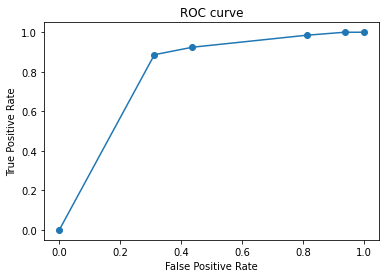

In [118]:
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [119]:
#roc is only 60, not a good model. 
roc_auc_score(y_test, y_pred)

0.6647727272727273

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    RandomForestClassifier(random_state=0, n_jobs=-1)
)
pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_test)
print('Train Accuracy:', pipeline.score(x_train,y_train))
print('Accuracy Score:', pipeline.score(x_val,y_val))

Train Accuracy: 1.0
Accuracy Score: 0.9121621621621622


In [121]:
#roc went up a tad bit 
roc_auc_score(y_test, y_pred)

0.6761363636363636

In [122]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
(fpr, tpr, thresholds)

(array([0.   , 0.625, 1.   ]),
 array([0.        , 0.97727273, 1.        ]),
 array([2, 1, 0]))

Text(0, 0.5, 'True Positive Rate')

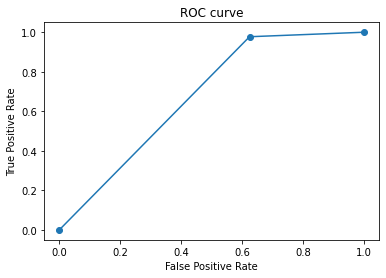

In [123]:
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Print X_train shape after encoding (440, 6)


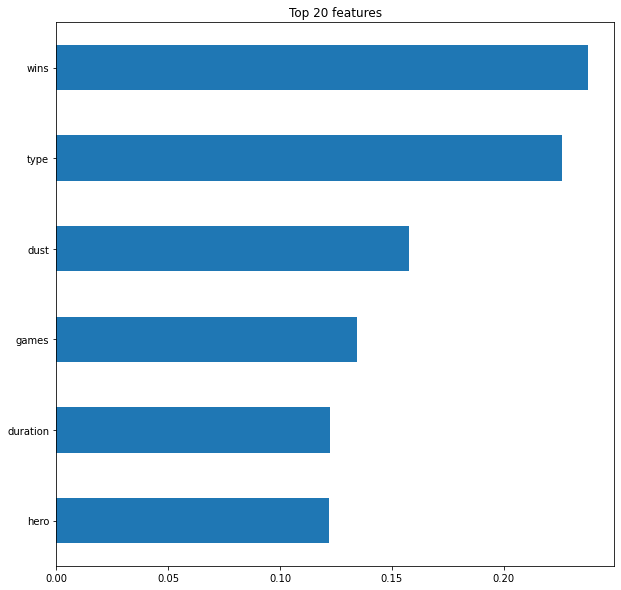

In [124]:
#notes for self (not a good model. But, may not have enough information to create a good model)
# Get encoded values
encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(x_train)
print ('Print X_train shape after encoding', encoded.shape)

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [0]:
#possibly look for a better, or more expansive data set. Or a data set we could combine, to get more information.